# Titanic


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from importlib import reload
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import optuna
import pickle

from modules import function


# 前処理

In [51]:
# Get raw data
train_data_raw = pd.read_csv("../data/raw/train.csv")
test_data_raw = pd.read_csv("../data/raw/test.csv")

# Extract used features
use_columns = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex", "Embarked"]
y_train = train_data_raw["Survived"]
train_data = train_data_raw[use_columns]
test_data = test_data_raw[use_columns]

# Make one hot features of Sex and Embarked
for column_name in ["Sex", "Embarked"]:
    train_data = function.add_one_hot(train_data, column_name)
    test_data = function.add_one_hot(test_data, column_name)
    
# Replace nan to mean of the column
train_data = function.nan_to_mean(train_data)
test_data = function.nan_to_mean(test_data)


x_train = train_data
x_test = test_data
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()



In [140]:
# Save prediction
PassengerId = np.array(test_data_raw["PassengerId"]).astype(int)
function.save_kaggle_prediction(y_pred, PassengerId, "Survived", "PassengerId")


<Axes: >

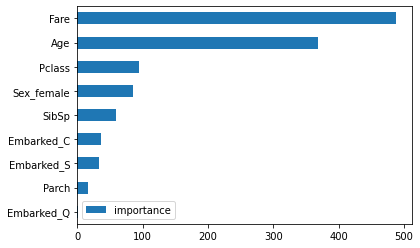

In [141]:
fi = clf.feature_importances_
fi = pd.DataFrame(fi, 
                 index=train_data.columns,
                 columns=["importance"])

fi = fi.sort_values("importance", ascending=True)
fi.plot.barh()

In [173]:

n_splits = 5
cv_cv = StratifiedKFold(
        n_splits=n_splits, shuffle=True, random_state=42)

cv_opt = StratifiedKFold(
        n_splits=3, shuffle=True, random_state=42)


study_list = function.cv_lgbm_bayesian_opt(x_train, y_train, cv_cv, cv_opt, params, n_trials=100)

In [174]:

with open("../data/processed/study_list_"+function.get_now_time()+".bin", 'wb') as p:
    pickle.dump(study_list, p)
  


In [31]:
with open("../data/processed/study_list_20230525_154947.bin", 'rb') as p:
    study_list = pickle.load(p)

best_pramas_list = []
for study in study_list:
    best_pramas_list.append(study.best_params)
print(best_pramas_list)

[{'num_leaves': 23, 'max_depth': 2, 'learning_rate': 0.046977005798683774}, {'num_leaves': 26, 'max_depth': 2, 'learning_rate': 0.029971710973680364}, {'num_leaves': 9, 'max_depth': 2, 'learning_rate': 0.10966529992688127}, {'num_leaves': 9, 'max_depth': 4, 'learning_rate': 0.1308455934899561}, {'num_leaves': 21, 'max_depth': 10, 'learning_rate': 0.050864369455988226}]


In [33]:
x = x_train2
y = y_train2

n_splits = 5
cv_cv = StratifiedKFold(
        n_splits=n_splits, shuffle=True, random_state=42)



In [41]:
clf_list = function.cv_lgbm_clf(x_train, y_train, cv_cv, best_pramas_list, eval_metric="logloss", stopping_rounds=50)

with open("../models/clf_list_"+function.get_now_time()+".bin", 'wb') as p:
    pickle.dump(clf_list, p)


In [49]:
# 多数決
with open("../models/clf_list_20230526_155950.bin", 'rb') as p:
    clf_list = pickle.load(p)

sum_pred = np.zeros(len(x_test))
for clf in clf_list:
    sum_pred+=clf.predict(x_test)

y_pred = np.where(sum_pred >= 3, 1, 0)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

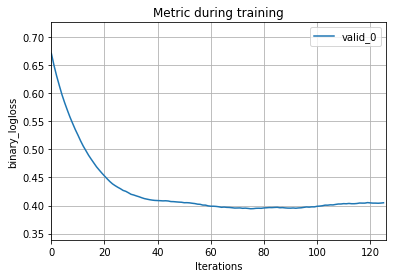

In [47]:
lgb.plot_metric(clf)
plt.show()

In [ ]:


x_label = "Age"
y_label = "Fare"
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(train_data_raw[x_label], train_data_raw[y_label], c=train_data_raw["Survived"], cmap='viridis')

# 軸ラベルの設定
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

# 凡例の表示
legend_labels = ['Dead', 'Survived']
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Labels')
